In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file = pd.read_csv("insurance.csv")
file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
file.shape

(1338, 7)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
file.duplicated().sum()

1

In [6]:
file.drop_duplicates(inplace = True)

In [7]:
file.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

<AxesSubplot:>

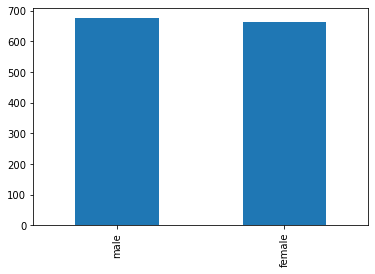

In [8]:
count = file["sex"].value_counts()
count.plot(kind= "bar")

<AxesSubplot:xlabel='age', ylabel='Count'>

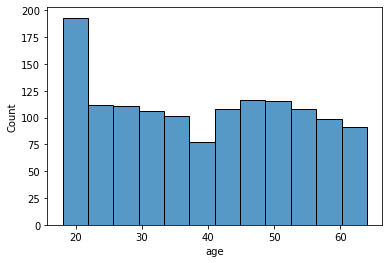

In [9]:
sns.histplot(file["age"])

<AxesSubplot:xlabel='children', ylabel='Count'>

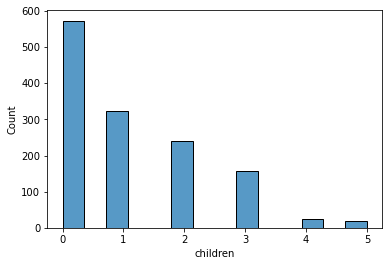

In [10]:
sns.histplot(file['children'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

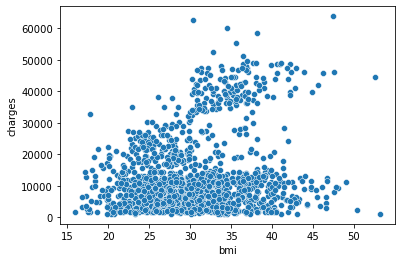

In [11]:
sns.scatterplot(x = file["bmi"], y = file["charges"])

<AxesSubplot:>

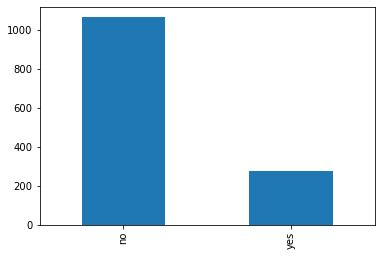

In [12]:
count3 = file['smoker'].value_counts()
count3.plot(kind = "bar")

# Model Building

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
y = file["charges"]
x = file.drop(["charges"], axis = 1)

In [15]:
numeric_features = ["age", "bmi", "children"]
numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy = "median")), ("ss", StandardScaler())])
categorical_features = ["sex", "smoker", "region"]
categorical_transformer = OneHotEncoder(sparse = False)

preprocessor = ColumnTransformer([("numeric",numeric_transformer,numeric_features),("cat", categorical_transformer, categorical_features)])
process = Pipeline([("preprocess",preprocessor), ("poly",PolynomialFeatures(degree = 2))])

In [16]:
x = process.fit_transform(x)
poly_reg = LinearRegression()

In [17]:
scores = cross_val_score(poly_reg, x, y , cv = 10, scoring = 'r2')
print("r2 score: ", round(np.mean(scores), 3))

r2 score:  0.835


In [18]:
model = poly_reg.fit(x,y)

In [19]:
#This new file is to save the trained model
import pickle
filename = "insurance_prediction.pkl"
pickle.dump(poly_reg, open(filename, 'wb') )


#This file is to scale my input
import pickle
file2 = "preprocess.pkl"
pickle.dump(process, open(file2, 'wb') )